In [1]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import numpy as np

In [3]:
stock_list = pd.read_csv('jpx_data/stock_list.csv')
sections = stock_list[['SecuritiesCode','Section/Products']]
print(sections.shape)
sec_code_list = sections.loc[sections['Section/Products']!='ETFs/ ETNs']['SecuritiesCode']
sec_code_list

(4417, 2)


0        1301
19       1332
20       1333
26       1352
37       1375
        ...  
4412     9994
4413     9995
4414     9996
4415     9997
4416    25935
Name: SecuritiesCode, Length: 4140, dtype: int64

In [4]:
financials = pd.read_csv('jpx_data/train_files/financials.csv')
financials
base_type = 'FinancialStatements_Consolidated_JP'
types = ['1Q'+base_type,'2Q'+base_type,'3Q'+base_type,'FY'+base_type]
financials = financials.loc[financials['TypeOfDocument'].isin(types)]

/var/folders/jf/5dj9dcfd1t7bw761tpfh_k3m0000gp/T/ipykernel_5258/2204587780.py:1: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  financials = pd.read_csv('jpx_data/train_files/financials.csv')


In [5]:
sec_code = 1332.0
data = financials.loc[financials['SecuritiesCode']==sec_code]
data

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
1590,2.017013e+13,20170203_1332,2017-02-03,1332.0,2017-02-03,13:00:00,1.486094e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,47.29,NaN,False,True,False,False,False,312430277.0,943904,290973976.0
8358,2.017043e+13,20170515_1332,2017-05-15,1332.0,2017-05-15,13:00:00,1.494821e+09,FYFinancialStatements_Consolidated_JP,2017-03-31,FY,...,64.21,NaN,False,True,False,False,False,312430277.0,945671,296031140.0
11275,2.017073e+13,20170804_1332,2017-08-04,1332.0,2017-08-04,13:00:00,1.501819e+09,1QFinancialStatements_Consolidated_JP,2017-06-30,1Q,...,64.21,NaN,False,False,False,False,False,312430277.0,946522,311484262.0
15631,2.017103e+13,20171102_1332,2017-11-02,1332.0,2017-11-02,13:00:00,1.509595e+09,2QFinancialStatements_Consolidated_JP,2017-09-30,2Q,...,64.21,NaN,False,False,False,False,False,312430277.0,949843,311483077.0
20213,2.018013e+13,20180205_1332,2018-02-05,1332.0,2018-02-05,13:00:00,1.517803e+09,3QFinancialStatements_Consolidated_JP,2017-12-31,3Q,...,64.21,NaN,False,False,False,False,False,312430277,952096,311481851
26490,2.018051e+13,20180514_1332,2018-05-14,1332.0,2018-05-14,13:00:00,1.526270e+09,FYFinancialStatements_Consolidated_JP,2018-03-31,FY,...,51.37,NaN,False,False,False,False,False,312430277,948795,311481273
29536,2.018080e+13,20180803_1332,2018-08-03,1332.0,2018-08-03,13:00:00,1.533269e+09,1QFinancialStatements_Consolidated_JP,2018-06-30,1Q,...,51.37,NaN,False,False,True,False,False,312430277,949434,311481117
34001,2.018110e+13,20181105_1332,2018-11-05,1332.0,2018-11-05,13:00:00,1.541390e+09,2QFinancialStatements_Consolidated_JP,2018-09-30,2Q,...,51.42,NaN,False,False,True,False,False,312430277.0,1281652,311405537.0
38304,2.019020e+13,20190205_1332,2019-02-05,1332.0,2019-02-05,13:00:00,1.549339e+09,3QFinancialStatements_Consolidated_JP,2018-12-31,3Q,...,51.42,NaN,False,False,True,False,False,312430277.0,1283143,311319364.0
44268,2.019042e+13,20190514_1332,2019-05-14,1332.0,2019-05-14,13:00:00,1.557806e+09,FYFinancialStatements_Consolidated_JP,2019-03-31,FY,...,56.24,NaN,False,False,True,False,False,312430277.0,1284069,311276763.0


In [6]:
print(data.columns)
data[[ 'NetSales',
       'OperatingProfit', 'OrdinaryProfit', 'Profit', 'EarningsPerShare',
       'TotalAssets', 'Equity', 'EquityToAssetRatio', 'ForecastNetSales',
       'ForecastOperatingProfit', 'ForecastOrdinaryProfit', 'ForecastProfit',
       'ForecastEarningsPerShare',
       'NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock',
       'NumberOfTreasuryStockAtTheEndOfFiscalYear', 'AverageNumberOfShares' ]].astype(float)




Index(['DisclosureNumber', 'DateCode', 'Date', 'SecuritiesCode',
       'DisclosedDate', 'DisclosedTime', 'DisclosedUnixTime', 'TypeOfDocument',
       'CurrentPeriodEndDate', 'TypeOfCurrentPeriod',
       'CurrentFiscalYearStartDate', 'CurrentFiscalYearEndDate', 'NetSales',
       'OperatingProfit', 'OrdinaryProfit', 'Profit', 'EarningsPerShare',
       'TotalAssets', 'Equity', 'EquityToAssetRatio', 'BookValuePerShare',
       'ResultDividendPerShare1stQuarter', 'ResultDividendPerShare2ndQuarter',
       'ResultDividendPerShare3rdQuarter',
       'ResultDividendPerShareFiscalYearEnd', 'ResultDividendPerShareAnnual',
       'ForecastDividendPerShare1stQuarter',
       'ForecastDividendPerShare2ndQuarter',
       'ForecastDividendPerShare3rdQuarter',
       'ForecastDividendPerShareFiscalYearEnd',
       'ForecastDividendPerShareAnnual', 'ForecastNetSales',
       'ForecastOperatingProfit', 'ForecastOrdinaryProfit', 'ForecastProfit',
       'ForecastEarningsPerShare',
       'ApplyingOf

,NetSales,OperatingProfit,OrdinaryProfit,Profit,EarningsPerShare,TotalAssets,Equity,EquityToAssetRatio,ForecastNetSales,ForecastOperatingProfit,ForecastOrdinaryProfit,ForecastProfit,ForecastEarningsPerShare,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
1590,4.688210e+11,1.871400e+10,2.072000e+10,1.237700e+10,42.54,4.550060e+11,1.326200e+11,0.249,6.280000e+11,2.150000e+10,2.350000e+10,1.400000e+10,47.29,312430277.0,943904.0,290973976.0
8358,6.359530e+11,2.264600e+10,2.488400e+10,1.421600e+10,48.02,4.518760e+11,1.412050e+11,0.268,6.560000e+11,2.400000e+10,2.600000e+10,2.000000e+10,64.21,312430277.0,945671.0,296031140.0
11275,1.627050e+11,6.720000e+09,6.968000e+09,5.061000e+09,16.25,4.644360e+11,1.434490e+11,0.269,6.560000e+11,2.400000e+10,2.600000e+10,2.000000e+10,64.21,312430277.0,946522.0,311484262.0
15631,3.328260e+11,1.302400e+10,1.331400e+10,9.247000e+09,29.69,4.871760e+11,1.492350e+11,0.267,6.560000e+11,2.400000e+10,2.600000e+10,2.000000e+10,64.21,312430277.0,949843.0,311483077.0
20213,5.163210e+11,2.059100e+10,2.133600e+10,1.642700e+10,52.74,5.001710e+11,1.588810e+11,0.279,6.770000e+11,2.400000e+10,2.600000e+10,2.000000e+10,64.21,312430277.0,952096.0,311481851.0
26490,6.830080e+11,2.348900e+10,2.484000e+10,1.733400e+10,55.65,4.846220e+11,1.571060e+11,0.284,6.980000e+11,2.200000e+10,2.350000e+10,1.600000e+10,51.37,312430277.0,948795.0,311481273.0
29536,1.747000e+11,7.481000e+09,8.219000e+09,5.234000e+09,16.81,4.806360e+11,1.593890e+11,0.292,6.980000e+11,2.200000e+10,2.350000e+10,1.600000e+10,51.37,312430277.0,949434.0,311481117.0
34001,3.504830e+11,1.056000e+10,1.195200e+10,6.919000e+09,22.22,4.928200e+11,1.642690e+11,0.294,7.065000e+11,2.200000e+10,2.350000e+10,1.600000e+10,51.42,312430277.0,1281652.0,311405537.0
38304,5.432610e+11,1.989900e+10,2.281200e+10,1.527300e+10,49.06,5.046520e+11,1.695150e+11,0.297,7.065000e+11,2.200000e+10,2.350000e+10,1.600000e+10,51.42,312430277.0,1283143.0,311319364.0
44268,7.121110e+11,2.168500e+10,2.535800e+10,1.537900e+10,49.41,4.779130e+11,1.661580e+11,0.306,7.100000e+11,2.400000e+10,2.650000e+10,1.750000e+10,56.24,312430277.0,1284069.0,311276763.0


# loading prices

In [7]:
prices = pd.read_csv('jpx_data/train_files/stock_prices.csv')
prices.Date = pd.to_datetime(prices['Date'])
prices.set_index('Date',inplace=True)
prices = prices[['Open','Close','SecuritiesCode']]
prices['diff'] = (prices['Close']-prices['Open'])/prices['Open']
prices

,Open,Close,SecuritiesCode,diff
Date,,,,
2017-01-04,2734.0,2742.0,1301,0.002926
2017-01-04,568.0,571.0,1332,0.005282
2017-01-04,3150.0,3210.0,1333,0.019048
2017-01-04,1510.0,1550.0,1376,0.026490
2017-01-04,3270.0,3330.0,1377,0.018349
...,...,...,...,...
2021-12-03,514.0,528.0,9990,0.027237
2021-12-03,782.0,794.0,9991,0.015345
2021-12-03,1690.0,1645.0,9993,-0.026627


<AxesSubplot:xlabel='Date'>

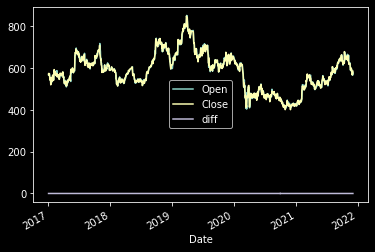

In [9]:
prices.loc[prices['SecuritiesCode']==1332][['Open','Close','diff']].plot()

In [24]:
prices.iloc[0]

Open              2734.000000
Close             2742.000000
SecuritiesCode    1301.000000
diff                 0.002926
Name: 2017-01-04 00:00:00, dtype: float64

In [28]:
# prices.loc[dt.datetime(2017,1,4):dt.datetime(2017,1,4)+relativedelta(months=6)]
# prices['diff'].mean()
class Continue_exception(Exception):
    pass

def get_diff_and_classification(sec_code,start_date,months=6):
    dt_date = [int(i) for i in start_date.split('-')]
    
    p_temp = prices.loc[prices['SecuritiesCode']==sec_code]
    p_temp = p_temp.loc[dt.datetime(dt_date[0],dt_date[1],dt_date[2]):dt.datetime(dt_date[0],dt_date[1],dt_date[2])+relativedelta(months=6)]
    if p_temp.shape[0]<2:
        raise Continue_exception
        
    diff_mean = p_temp['diff'].mean()

    if p_temp.iloc[-1]['Close']<p_temp.iloc[0]['Close']:
        classification = 0
    else:
        classification = 1

    return diff_mean,classification



# making the dataset

In [29]:
x = []
y = []
y_c = []
columns_to_look_at = [ 'NetSales',
                        'OperatingProfit', 'OrdinaryProfit', 'Profit', 'EarningsPerShare',
                        'TotalAssets', 'Equity', 'EquityToAssetRatio', 'ForecastNetSales',
                        'ForecastOperatingProfit', 'ForecastOrdinaryProfit', 'ForecastProfit',
                        'ForecastEarningsPerShare',
                        'NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock',
                        'NumberOfTreasuryStockAtTheEndOfFiscalYear', 'AverageNumberOfShares' ]

columns_to_get = columns_to_look_at.copy()
columns_to_get.extend(['SecuritiesCode','DisclosedDate'])


for sec_code in sec_code_list:
    financial_sec_code = financials.loc[financials['SecuritiesCode']==sec_code]
    for index,row in financial_sec_code.iterrows():
        disclosed_date = row['DisclosedDate']
        try:
            diff_mean, classification = get_diff_and_classification(sec_code,disclosed_date)
        except Continue_exception:
            continue
        x.append(row[columns_to_get])
        y.append(diff_mean)
        y_c.append(classification)
        

In [33]:
x=pd.DataFrame(x)
x_data = x[columns_to_look_at]
x_data = x_data.apply(pd.to_numeric,errors='coerce')
x_data=x_data.fillna(0).astype(float)

y_df = pd.DataFrame(y)
y_df.fillna(0,inplace=True)


In [34]:
x_data

,NetSales,OperatingProfit,OrdinaryProfit,Profit,EarningsPerShare,TotalAssets,Equity,EquityToAssetRatio,ForecastNetSales,ForecastOperatingProfit,ForecastOrdinaryProfit,ForecastProfit,ForecastEarningsPerShare,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
2781,1.799750e+11,2.872000e+09,2.827000e+09,2.449000e+09,233.26,1.171680e+11,2.577900e+10,0.217,2.440000e+11,3.500000e+09,3.300000e+09,2.100000e+09,199.94,10928283.0,425455.0,10503022.0
6892,2.365610e+11,3.723000e+09,3.709000e+09,2.422000e+09,230.66,9.739100e+10,2.539100e+10,0.256,2.500000e+11,4.000000e+09,4.000000e+09,2.700000e+09,257.07,10928283.0,425510.0,10502960.0
11274,5.684400e+10,9.790000e+08,1.103000e+09,7.540000e+08,71.80,1.074220e+11,2.556000e+10,0.234,2.500000e+11,4.000000e+09,4.000000e+09,2.700000e+09,257.07,10928283.0,425510.0,10502773.0
15877,1.204580e+11,2.246000e+09,2.396000e+09,1.633000e+09,155.50,1.198060e+11,2.669200e+10,0.220,2.500000e+11,4.000000e+09,4.000000e+09,2.700000e+09,257.07,10928283.0,422090.0,10503343.0
21130,1.983230e+11,3.863000e+09,4.065000e+09,2.784000e+09,265.04,1.245430e+11,2.820400e+10,0.223,2.500000e+11,4.000000e+09,4.000000e+09,2.700000e+09,257.07,10928283.0,411773.0,10505430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70913,9.113900e+10,4.565000e+09,5.124000e+09,2.923000e+09,30.24,2.285260e+11,1.054890e+11,0.459,1.970000e+11,1.250000e+10,1.330000e+10,9.500000e+09,98.28,97244472.0,571586.0,96660785.0
75396,1.541450e+11,1.160700e+10,1.248700e+10,8.620000e+09,89.18,2.412190e+11,1.099450e+11,0.453,2.000000e+11,1.400000e+10,1.480000e+10,1.050000e+10,108.62,97244472.0,571610.0,96664827.0
82261,2.064990e+11,1.573400e+10,1.687200e+10,1.103600e+10,114.17,2.402110e+11,1.132310e+11,0.469,2.460000e+11,1.750000e+10,1.820000e+10,1.250000e+10,129.31,97244472.0,571852.0,96666782.0
85389,5.892600e+10,2.316000e+09,2.660000e+09,1.663000e+09,17.21,2.514460e+11,1.148210e+11,0.454,2.460000e+11,1.750000e+10,1.820000e+10,1.250000e+10,129.30,97244472.0,571892.0,96672603.0


# making the regression

In [14]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import matplotlib.pyplot as plt

In [15]:
param_grid = {
    'num_leaves': [20,50,100],
    'n_estimators':[100,500,1000],
    'learning_rate':[0.1,0.01,0.001],
}

estimator = lgb.LGBMRegressor(boosting_type='gbdt',objective='regression')

gsearch = GridSearchCV(estimator,param_grid,n_jobs=-1,cv=5)

lgbmodel=gsearch.fit(X=x_data,y=y_df)
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))

Best: 0.005579 using {'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 20}


In [16]:
y_pred=lgbmodel.best_estimator_.predict(x_data)

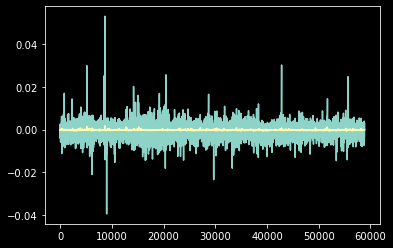

In [17]:
plt.figure()
plt.plot(y_df)
plt.plot(y_pred)

In [18]:
np.array(columns_to_look_at)[np.argsort(lgbmodel.best_estimator_.feature_importances_)]

array(['OperatingProfit', 'EarningsPerShare', 'Profit', 'OrdinaryProfit',
       'ForecastOrdinaryProfit', 'ForecastOperatingProfit', 'NetSales',
       'NumberOfTreasuryStockAtTheEndOfFiscalYear', 'ForecastProfit',
       'ForecastEarningsPerShare', 'TotalAssets',
       'NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock',
       'ForecastNetSales', 'AverageNumberOfShares', 'Equity',
       'EquityToAssetRatio'], dtype='<U76')

In [37]:
param_grid = {
    'num_leaves': [20,50,100,500],
    'n_estimators':[100,500,1000,5000],
    'learning_rate':[0.1,0.01,0.001,0.0001],
}
#boosting types: gbdt, rf, dart, goss
estimator = lgb.LGBMClassifier(boosting_type='gbdt')

gsearch = GridSearchCV(estimator,param_grid,n_jobs=-1,cv=5)

lgbmodel=gsearch.fit(X=x_data,y=y_c)
print("Best: %f using %s" % (gsearch.best_score_, gsearch.best_params_))

Best: 0.536811 using {'learning_rate': 0.001, 'n_estimators': 1000, 'num_leaves': 50}


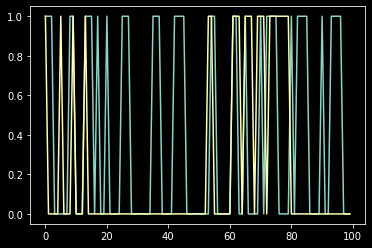

In [39]:
y_pred_c=lgbmodel.best_estimator_.predict(x_data)

plt.figure()
plt.plot(y_c[:100])
plt.plot(y_pred_c[:100])